In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('heart.csv')

In [6]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_features = poly.fit_transform(data.drop(columns=['DEATH_EVENT']))
feature_names = poly.get_feature_names_out(data.drop(columns=['DEATH_EVENT']).columns)

In [7]:
poly_df = pd.DataFrame(poly_features, columns=feature_names)
poly_df['DEATH_EVENT'] = data['DEATH_EVENT']


In [8]:
X = poly_df.drop(columns=['DEATH_EVENT'])
y = poly_df['DEATH_EVENT']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 75.00%
Confusion Matrix:
[[32  3]
 [12 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60



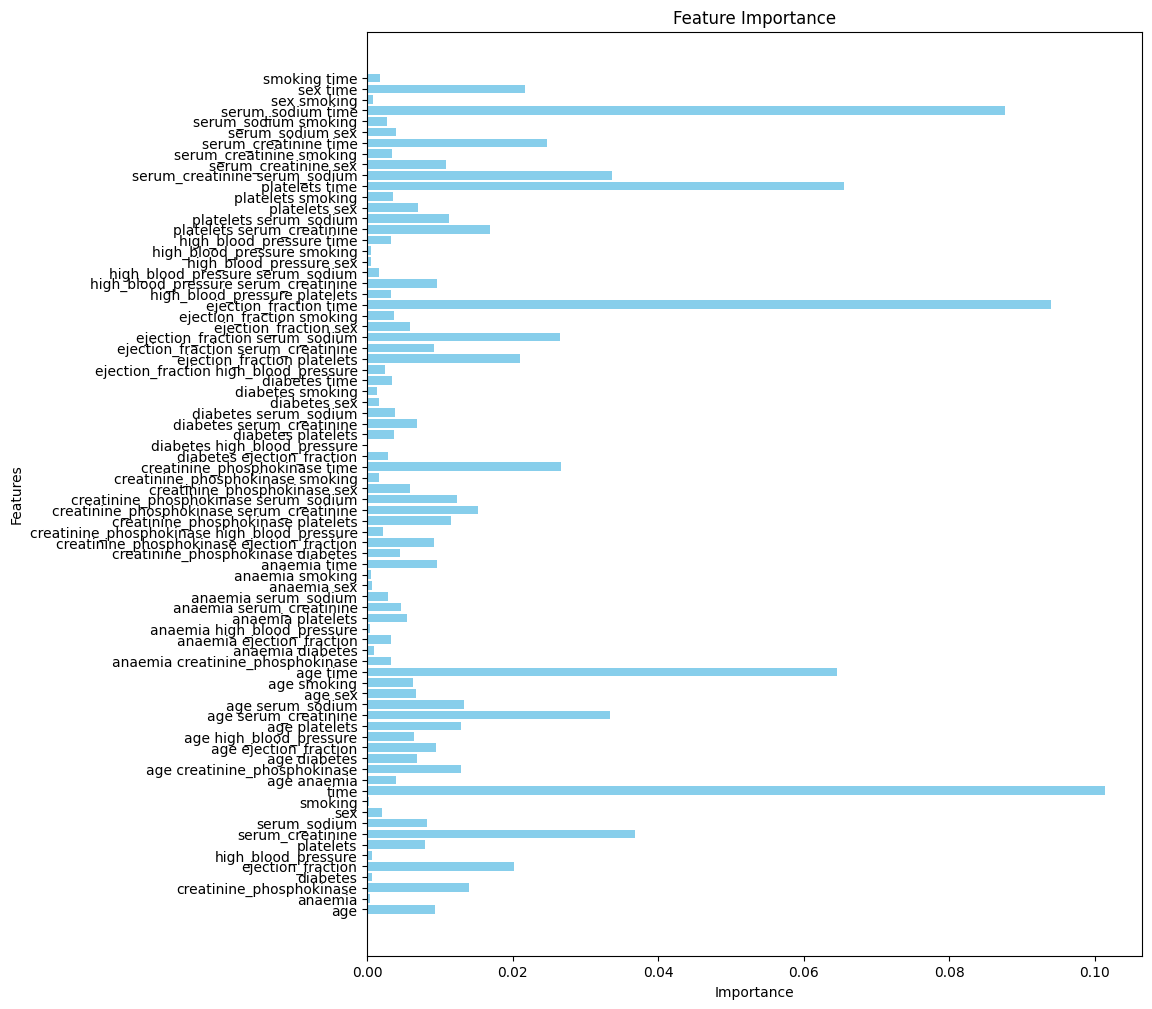

In [16]:
importances = model.feature_importances_

plt.figure(figsize=(10, 12))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()



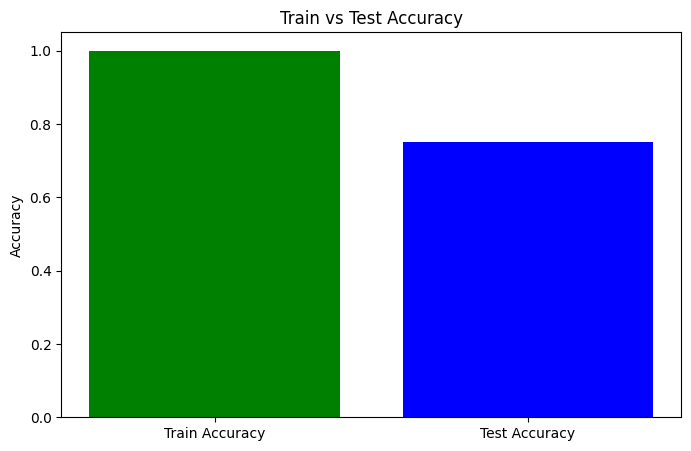

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(['Train Accuracy', 'Test Accuracy'], [model.score(X_train, y_train), accuracy], color=['green', 'blue'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.show()

In [18]:
def predict_heart_failure(new_data):
    """
    Predict whether heart failure will occur based on new patient data.

    Parameters:
    new_data (numpy.ndarray): Input features for a single patient, shape (1, n_features)

    Returns:
    dict: Prediction and probability of heart failure
    """
    new_data_poly = poly.transform(new_data)
    new_data_scaled = scaler.transform(new_data_poly)

    # Predict the class
    prediction = model.predict(new_data_scaled)

    # Predict the probability
    probability = model.predict_proba(new_data_scaled)

    return {
        "Prediction": int(prediction[0]),
        "Probability": float(probability[0][1])  # Probability of class 1 (heart failure)
    }

# Example usage of prediction function
example_patient = np.array([[75, 1, 582, 0, 20, 1, 265000, 1.9, 130, 1, 0, 4]])  # Replace with actual values
result = predict_heart_failure(example_patient)
print("Prediction (0 = No, 1 = Yes):", result["Prediction"])
print("Probability of Heart Failure:", result["Probability"])

Prediction (0 = No, 1 = Yes): 1
Probability of Heart Failure: 0.99
